In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/Mall_Customers.csv')

In [3]:
df


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df['CustomerID'].nunique()

200

In [6]:
df['Genre'].value_counts()

,count
Genre,
Female,112
Male,88


In [7]:
df['Genre']=df['Genre'].map({'Male':1,'Female':0})

In [8]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


<Axes: >

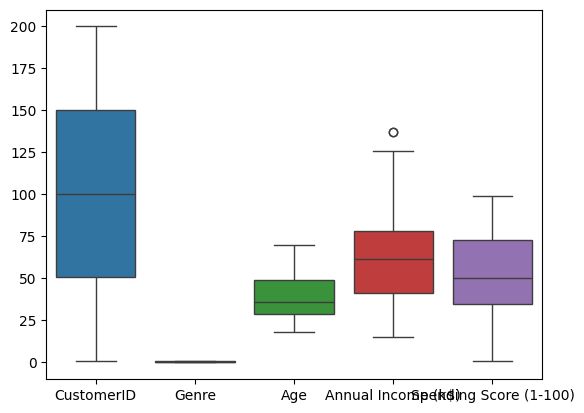

In [10]:
sns.boxplot(df)

In [11]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].values


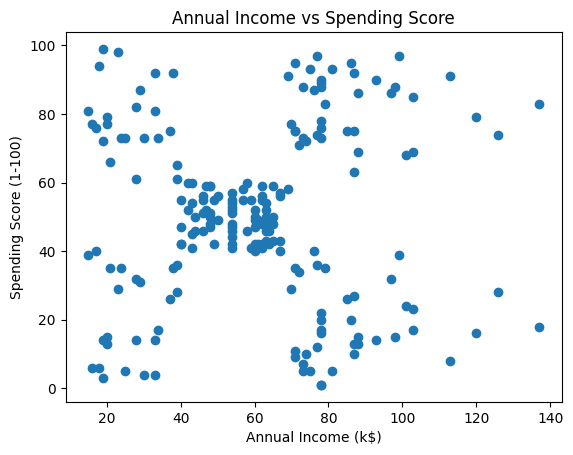

In [12]:
plt.scatter(x[:, 0], x[:, 1])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler


In [16]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)



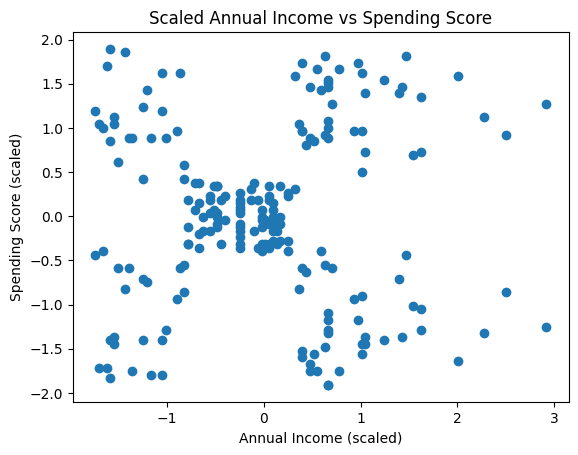

In [18]:

plt.scatter(x_scaled[:, 0], x_scaled[:, 1])
plt.title('Scaled Annual Income vs Spending Score')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [19]:
from sklearn.cluster import DBSCAN

In [20]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_dbscan = dbscan.fit_predict(x_scaled)


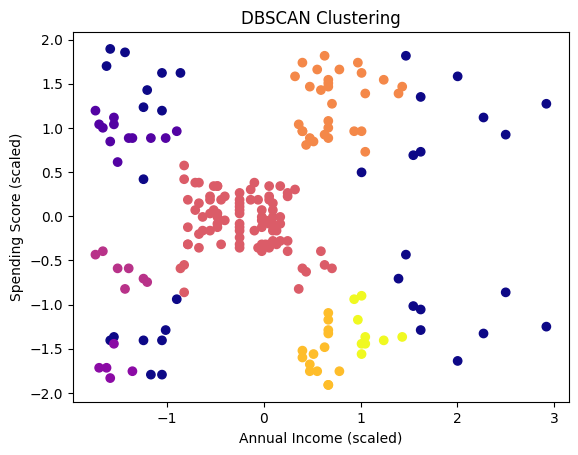

In [21]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=y_dbscan, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()

In [23]:
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise = list(y_dbscan).count(-1)


In [24]:
print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')


Estimated number of clusters: 7
Estimated number of noise points: 35


In [25]:
from sklearn.metrics import silhouette_score

In [26]:
silhouette_avg = silhouette_score(x_scaled, y_dbscan)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.31614121976731185
